In [20]:
%matplotlib inline

import sys
sys.path.append('../')

In [21]:
from matplotlib import pyplot as plt
from src.data_analysis.analysis_helpers import get_run_ids, get_labeledSamples_avgAcc, get_out_dirs
%matplotlib inline
# %pylab

import sys
import glob
sys.path.append('../')

from mlflow.tracking import MlflowClient
from src.database.mlflow import MLFlowClient
db = MLFlowClient(tracking_uri="http://mlflow.dbs.ifi.lmu.de:5000/", experiment_name="DMBAL")
tracking = MlflowClient()

runs_margin = db.get_entries(['params.diversity_strategy', "params.uncertainty"],[True, True],["random_uncertainty", "margin"])
print(len(runs_margin))
run_ids_margin = get_run_ids(runs_margin)

10


In [22]:
runs_least = db.get_entries(['params.diversity_strategy', "params.uncertainty"],[True, True],["random_uncertainty", "least_confident"])
print(len(runs_least))
run_ids_least = get_run_ids(runs_least)

10


In [23]:
runs_entropy = db.get_entries(['params.diversity_strategy', "params.uncertainty"],[True, True],["random_uncertainty", "entropy"])
print(len(runs_entropy))
run_ids_entropy = get_run_ids(runs_entropy)

10


In [24]:
samples_labeled_margin, avg_accs_margin = get_labeledSamples_avgAcc(run_ids_margin, tracking)
samples_labeled_least, avg_accs_least = get_labeledSamples_avgAcc(run_ids_least, tracking)
samples_labeled_entropy, avg_accs_entropy = get_labeledSamples_avgAcc(run_ids_entropy, tracking)

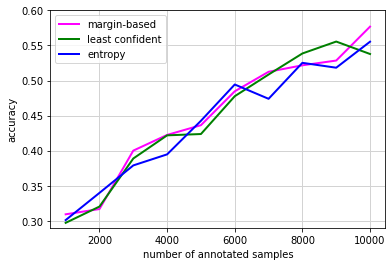

In [29]:
# plot
plt.plot(samples_labeled_margin, avg_accs_margin,color='magenta', label='margin-based', linewidth=2)
plt.plot(samples_labeled_least, avg_accs_least,color='green', label='least confident', linewidth=2)
plt.plot(samples_labeled_entropy, avg_accs_entropy,color='blue', label='entropy', linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.60])

plt.show()

In [26]:
avg_accs_margin

array([0.30923, 0.31676, 0.40005, 0.42242, 0.43629, 0.4846 , 0.51242,
       0.52166, 0.52844, 0.57678])

In [27]:
avg_accs_least

array([0.29707, 0.32029, 0.38882, 0.42182, 0.42369, 0.47761, 0.50851,
       0.53854, 0.55552, 0.53779])

In [28]:
avg_accs_entropy

array([0.30102, 0.3398 , 0.37895, 0.3947 , 0.44257, 0.49431, 0.47391,
       0.52519, 0.51824, 0.55531])